# Cleaning data and the skies

## 📖 Background
Your are a data analyst at an environmental company. Your task is to evaluate ozone pollution across various regions.

You’ve obtained data from the U.S. Environmental Protection Agency (EPA), containing daily ozone measurements at monitoring stations across California. However, like many real-world datasets, it’s far from clean: there are missing values, inconsistent formats, potential duplicates, and outliers.

Before you can provide meaningful insights, you must clean and validate the data. Only then can you analyze it to uncover trends, identify high-risk regions, and assess where policy interventions are most urgently needed.

## 💾 The data
The data is a modified dataset from the U.S. Environmental Protection Agency ([EPA](https://www.epa.gov/outdoor-air-quality-data/download-daily-data)). 

#### Ozone contains the daily air quality summary statistics by monitor for the state of California for 2024. Each row contains the date and the air quality metrics per collection method and site
- "Date" - the calendar date with which the air quality values are associated
- "Source" - the data source: EPA's Air Quality System (AQS), or Airnow reports
- "Site ID" - the id for the air monitoring site
- "POC" - the id number for the monitor
- "Daily Max 8-hour Ozone Concentration" - the highest 8-hour value of the day for ozone concentration
- "Units" - parts per million by volume (ppm)
- "Daily AQI Value" - the highest air quality index value for the day, telling how clean or polluted the air is (a value of 50 represents good air quality, while a value above 300 is hazardous)
- "Local Site Name" - name of the monitoring site
- "Daily Obs Count" - number of observations reported in that day
- "Percent Complete" - indicates whether all expected samples were collected
- "Method Code" - identifier for the collection method
- "CBSA Code" - identifier for the core base statistical area (CBSA)
- "CBSA Name" - name of the core base statistical area
- "State FIPS Code" - identifier for the state
- "State" - name of the state
- "County FIPS Code" - identifer for the county
- "County" - name of the county
- "Site Latitude" - latitude coordinates of the site
- "Site Longitude" - longitude coordinates of the side

In [44]:
import pandas as pd
ozone = pd.read_csv('data/ozone.csv')
ozone.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,/2024,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,01/02/2024,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,/2024,AQS,60010007,1,NaN,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,January 04/2024,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,January 05/2024,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


## 💪 Competition challenge

Create a report that covers the following:
1. Your EDA and data cleaning process.
2. How does daily maximum 8-hour ozone concentration vary over time and regions?
3. Are there any areas that consistently show high ozone concentrations? Do different methods report different ozone levels?
4. Consider if urban activity (weekend vs. weekday) has any affect on ozone levels across different days.
5. Bonus: plot a geospatial heatmap showing any high ozone concentrations.

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!

In [45]:
ozone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54759 entries, 0 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  54759 non-null  object 
 1   Source                                54759 non-null  object 
 2   Site ID                               54759 non-null  int64  
 3   POC                                   54759 non-null  int64  
 4   Daily Max 8-hour Ozone Concentration  52021 non-null  float64
 5   Units                                 54759 non-null  object 
 6   Daily AQI Value                       52021 non-null  float64
 7   Local Site Name                       54759 non-null  object 
 8   Daily Obs Count                       54759 non-null  int64  
 9   Percent Complete                      54759 non-null  float64
 10  Method Code                           48269 non-null  float64
 11  CBSA Code      

In [46]:
print("Count missing value", ozone.isnull().sum())

Count missing value Date                                       0
Source                                     0
Site ID                                    0
POC                                        0
Daily Max 8-hour Ozone Concentration    2738
Units                                      0
Daily AQI Value                         2738
Local Site Name                            0
Daily Obs Count                            0
Percent Complete                           0
Method Code                             6490
CBSA Code                               2408
CBSA Name                               2408
County FIPS Code                           0
County                                     0
Site Latitude                              0
Site Longitude                             0
dtype: int64


In [47]:
ozone.columns = ozone.columns.str.lower().str.replace(' ', '_')
ozone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54759 entries, 0 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  54759 non-null  object 
 1   source                                54759 non-null  object 
 2   site_id                               54759 non-null  int64  
 3   poc                                   54759 non-null  int64  
 4   daily_max_8-hour_ozone_concentration  52021 non-null  float64
 5   units                                 54759 non-null  object 
 6   daily_aqi_value                       52021 non-null  float64
 7   local_site_name                       54759 non-null  object 
 8   daily_obs_count                       54759 non-null  int64  
 9   percent_complete                      54759 non-null  float64
 10  method_code                           48269 non-null  float64
 11  cbsa_code      

In [48]:
datetime_columns =["date"]

for column in datetime_columns:
    ozone[column] = pd.to_datetime(ozone[column])

ozone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54759 entries, 0 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  54759 non-null  datetime64[ns]
 1   source                                54759 non-null  object        
 2   site_id                               54759 non-null  int64         
 3   poc                                   54759 non-null  int64         
 4   daily_max_8-hour_ozone_concentration  52021 non-null  float64       
 5   units                                 54759 non-null  object        
 6   daily_aqi_value                       52021 non-null  float64       
 7   local_site_name                       54759 non-null  object        
 8   daily_obs_count                       54759 non-null  int64         
 9   percent_complete                      54759 non-null  float64       
 10

In [49]:

ozone.drop(columns=['site_id'], inplace=True)
ozone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54759 entries, 0 to 54758
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  54759 non-null  datetime64[ns]
 1   source                                54759 non-null  object        
 2   poc                                   54759 non-null  int64         
 3   daily_max_8-hour_ozone_concentration  52021 non-null  float64       
 4   units                                 54759 non-null  object        
 5   daily_aqi_value                       52021 non-null  float64       
 6   local_site_name                       54759 non-null  object        
 7   daily_obs_count                       54759 non-null  int64         
 8   percent_complete                      54759 non-null  float64       
 9   method_code                           48269 non-null  float64       
 10

In [50]:
ozone.duplicated().sum()

3714

In [51]:
ozone.drop_duplicates(inplace=True)

In [52]:
ozone.describe()

,date,poc,daily_max_8-hour_ozone_concentration,daily_aqi_value,daily_obs_count,percent_complete,method_code,cbsa_code,county_fips_code,site_latitude,site_longitude
count,51045,51045.000000,48319.000000,48323.000000,51045.000000,51045.000000,44886.000000,48808.000000,51045.000000,51045.000000,51045.000000
mean,2024-06-11 17:39:56.967381760,1.000274,0.043639,45.575875,28.218905,99.301401,89.246224,36100.133994,58.833167,36.173010,-119.663028
min,2024-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,6.000000,47.000000,12540.000000,1.000000,32.578165,-124.179490
25%,2024-02-27 00:00:00,1.000000,0.034000,31.000000,17.000000,100.000000,87.000000,31080.000000,31.000000,34.181977,-121.420838
50%,2024-06-11 00:00:00,1.000000,0.041000,38.000000,17.000000,100.000000,87.000000,40140.000000,65.000000,36.209286,-119.828400
75%,2024-09-20 00:00:00,1.000000,0.052000,48.000000,17.000000,100.000000,87.000000,41860.000000,81.000000,37.961578,-118.068500
max,2024-12-31 00:00:00,2.000000,0.139000,236.000000,1000.000000,100.000000,199.000000,49700.000000,113.000000,41.726892,-114.602090
std,NaN,0.016559,0.014804,26.350914,101.073684,3.762220,36.834478,9542.514551,30.027087,2.190145,2.022745


In [53]:
ozone.isnull().sum()

date                                       0
source                                     0
poc                                        0
daily_max_8-hour_ozone_concentration    2726
units                                      0
daily_aqi_value                         2722
local_site_name                            0
daily_obs_count                            0
percent_complete                           0
method_code                             6159
cbsa_code                               2237
cbsa_name                               2237
county_fips_code                           0
county                                     0
site_latitude                              0
site_longitude                             0
dtype: int64

In [54]:
for col in ozone.select_dtypes(include=['object']).columns:
    print(ozone[col].value_counts(dropna=False))
    print("-" * 20)

source
AQS       44886
AirNow     6159
Name: count, dtype: int64
--------------------
units
ppm    51045
Name: count, dtype: int64
--------------------
local_site_name
Pomona                     355
Fontana                    351
Palm Springs               351
Madera-City                351
Crestline                  351
                          ... 
San Martin                 175
Echo Summit                171
Ukiah-Municipal Airport     85
Livermore                   24
Merced-Coffee                9
Name: count, Length: 162, dtype: int64
--------------------
cbsa_name
Riverside-San Bernardino-Ontario, CA             6772
Sacramento--Roseville--Arden-Arcade, CA          4709
Los Angeles-Long Beach-Anaheim, CA               4696
San Francisco-Oakland-Hayward, CA                3301
San Diego-Carlsbad, CA                           2957
Santa Maria-Santa Barbara, CA                    2922
Bakersfield, CA                                  2692
Fresno, CA                                 

In [55]:
mean_column = ['daily_max_8-hour_ozone_concentration','daily_aqi_value']

for col in mean_column:
    ozone[col] =ozone[col].fillna(ozone[col].mean())

In [56]:
mode_column = ['method_code','cbsa_code'] 

for col in mode_column:
    ozone[col] =ozone[col].fillna(ozone[col].mode()[0])

In [57]:
ozone['cbsa_name'] = ozone['cbsa_name'].fillna(value="Unknown")
ozone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51045 entries, 0 to 54758
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  51045 non-null  datetime64[ns]
 1   source                                51045 non-null  object        
 2   poc                                   51045 non-null  int64         
 3   daily_max_8-hour_ozone_concentration  51045 non-null  float64       
 4   units                                 51045 non-null  object        
 5   daily_aqi_value                       51045 non-null  float64       
 6   local_site_name                       51045 non-null  object        
 7   daily_obs_count                       51045 non-null  int64         
 8   percent_complete                      51045 non-null  float64       
 9   method_code                           51045 non-null  float64       
 10  cbs

In [58]:
ozone.isnull().sum()

date                                    0
source                                  0
poc                                     0
daily_max_8-hour_ozone_concentration    0
units                                   0
daily_aqi_value                         0
local_site_name                         0
daily_obs_count                         0
percent_complete                        0
method_code                             0
cbsa_code                               0
cbsa_name                               0
county_fips_code                        0
county                                  0
site_latitude                           0
site_longitude                          0
dtype: int64

In [59]:
ozone.duplicated().sum()

0

In [60]:
#check outlier
import matplotlib.pyplot as plt
import seaborn as sns
num_feat = ozone.select_dtypes(include='number').columns
plt.figure(figsize=(60, 60))
for i, col in enumerate(num_feat):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=ozone[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [61]:
#Handling outlier
import numpy as np
num_feat =['poc','daily_max_8-hour_ozone_concentration','daily_aqi_value','daily_obs_count','percent_complete','method_code','cbsa_code']

for  col in num_feat:
    Q1 = ozone[col].quantile(0.25)
    Q3 = ozone[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5 *IQR
    upper_bound = Q3+1.5 *IQR
    
    #Custom function to replace outliers with upper and lower bounds
    ozone[col] = np.clip(ozone[col], lower_bound, upper_bound)
ozone.head()

,date,source,poc,daily_max_8-hour_ozone_concentration,units,daily_aqi_value,local_site_name,daily_obs_count,percent_complete,method_code,cbsa_code,cbsa_name,county_fips_code,county,site_latitude,site_longitude
0,2024-01-01,AQS,1,0.031000,ppm,29.0,Livermore,17,100.0,87.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,2024-01-02,AQS,1,0.037000,ppm,34.0,Livermore,17,100.0,87.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,2024-01-01,AQS,1,0.043639,ppm,30.0,Livermore,17,100.0,87.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,2024-01-04,AQS,1,0.026000,ppm,24.0,Livermore,17,100.0,87.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,2024-01-05,AQS,1,0.027000,ppm,25.0,Livermore,17,100.0,87.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


In [62]:
ozone.duplicated().sum()

363

In [63]:
ozone.drop_duplicates(inplace=True)

In [64]:
ozone.duplicated().sum()

0

In [65]:
ozone.drop(columns=['source','poc','units','daily_aqi_value','method_code','percent_complete','cbsa_code', 'county_fips_code'], inplace=True)
ozone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50682 entries, 0 to 54758
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  50682 non-null  datetime64[ns]
 1   daily_max_8-hour_ozone_concentration  50682 non-null  float64       
 2   local_site_name                       50682 non-null  object        
 3   daily_obs_count                       50682 non-null  int64         
 4   cbsa_name                             50682 non-null  object        
 5   county                                50682 non-null  object        
 6   site_latitude                         50682 non-null  float64       
 7   site_longitude                        50682 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 3.5+ MB


In [66]:
ozone.describe(include='all')

,date,daily_max_8-hour_ozone_concentration,local_site_name,daily_obs_count,cbsa_name,county,site_latitude,site_longitude
count,50682,50682.000000,50682,50682.0,50682,50682,50682.000000,50682.000000
unique,NaN,NaN,162,NaN,33,50,NaN,NaN
top,NaN,NaN,Madera-City,NaN,"Riverside-San Bernardino-Ontario, CA",Los Angeles,NaN,NaN
freq,NaN,NaN,351,NaN,6680,3948,NaN,NaN
mean,2024-06-12 20:43:53.834497536,0.043313,NaN,17.0,NaN,NaN,36.177449,-119.667538
min,2024-01-01 00:00:00,0.008500,NaN,17.0,NaN,NaN,32.578165,-124.179490
25%,2024-02-29 00:00:00,0.034000,NaN,17.0,NaN,NaN,34.181977,-121.420838
50%,2024-06-12 00:00:00,0.042000,NaN,17.0,NaN,NaN,36.308150,-119.828400
75%,2024-09-20 00:00:00,0.051000,NaN,17.0,NaN,NaN,37.961578,-118.068500
max,2024-12-31 00:00:00,0.076500,NaN,17.0,NaN,NaN,41.726892,-114.602090


In [67]:
ozone['day']=ozone['date'].dt.dayofweek
ozone[['date','day']].head()

,date,day
0,2024-01-01,0
1,2024-01-02,1
2,2024-01-01,0
3,2024-01-04,3
4,2024-01-05,4


In [68]:

ozone['month']= ozone['date'].dt.month
ozone[['date', 'month', 'day']].head()

,date,month,day
0,2024-01-01,1,0
1,2024-01-02,1,1
2,2024-01-01,1,0
3,2024-01-04,1,3
4,2024-01-05,1,4


In [69]:
ozone = ozone.rename(columns = {'daily_max_8-hour_ozone_concentration':'daily_ozone_concentration'})
ozone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50682 entries, 0 to 54758
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       50682 non-null  datetime64[ns]
 1   daily_ozone_concentration  50682 non-null  float64       
 2   local_site_name            50682 non-null  object        
 3   daily_obs_count            50682 non-null  int64         
 4   cbsa_name                  50682 non-null  object        
 5   county                     50682 non-null  object        
 6   site_latitude              50682 non-null  float64       
 7   site_longitude             50682 non-null  float64       
 8   day                        50682 non-null  int32         
 9   month                      50682 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(3)
memory usage: 3.9+ MB


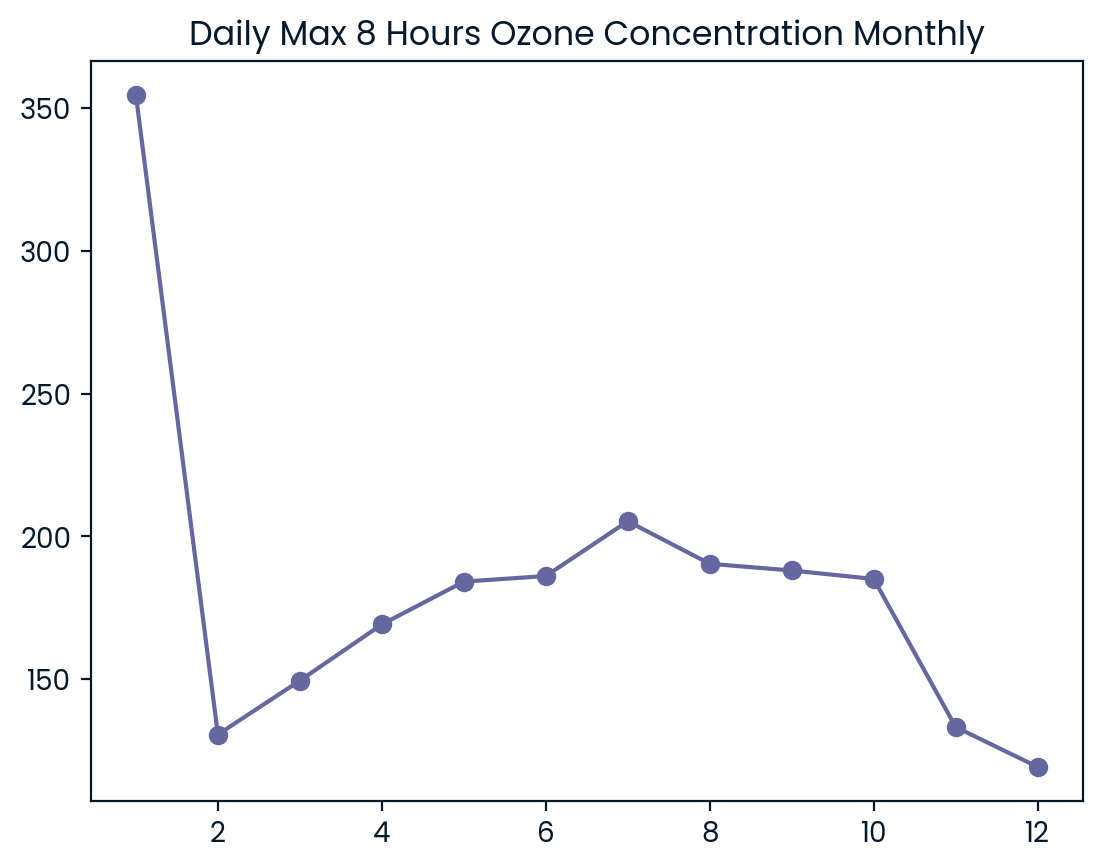

In [70]:
bymonth = ozone.groupby(by = "month").daily_ozone_concentration.sum().reset_index()
bymonth.rename(columns={
    "daily_ozone_concentration" : "dm_sum",
}, inplace =True)

x=bymonth['month']
y = bymonth['dm_sum']
plt.plot(x, y, marker='o', linestyle='-' )
plt.title('Daily Max 8 Hours Ozone Concentration Monthly')
plt.show()

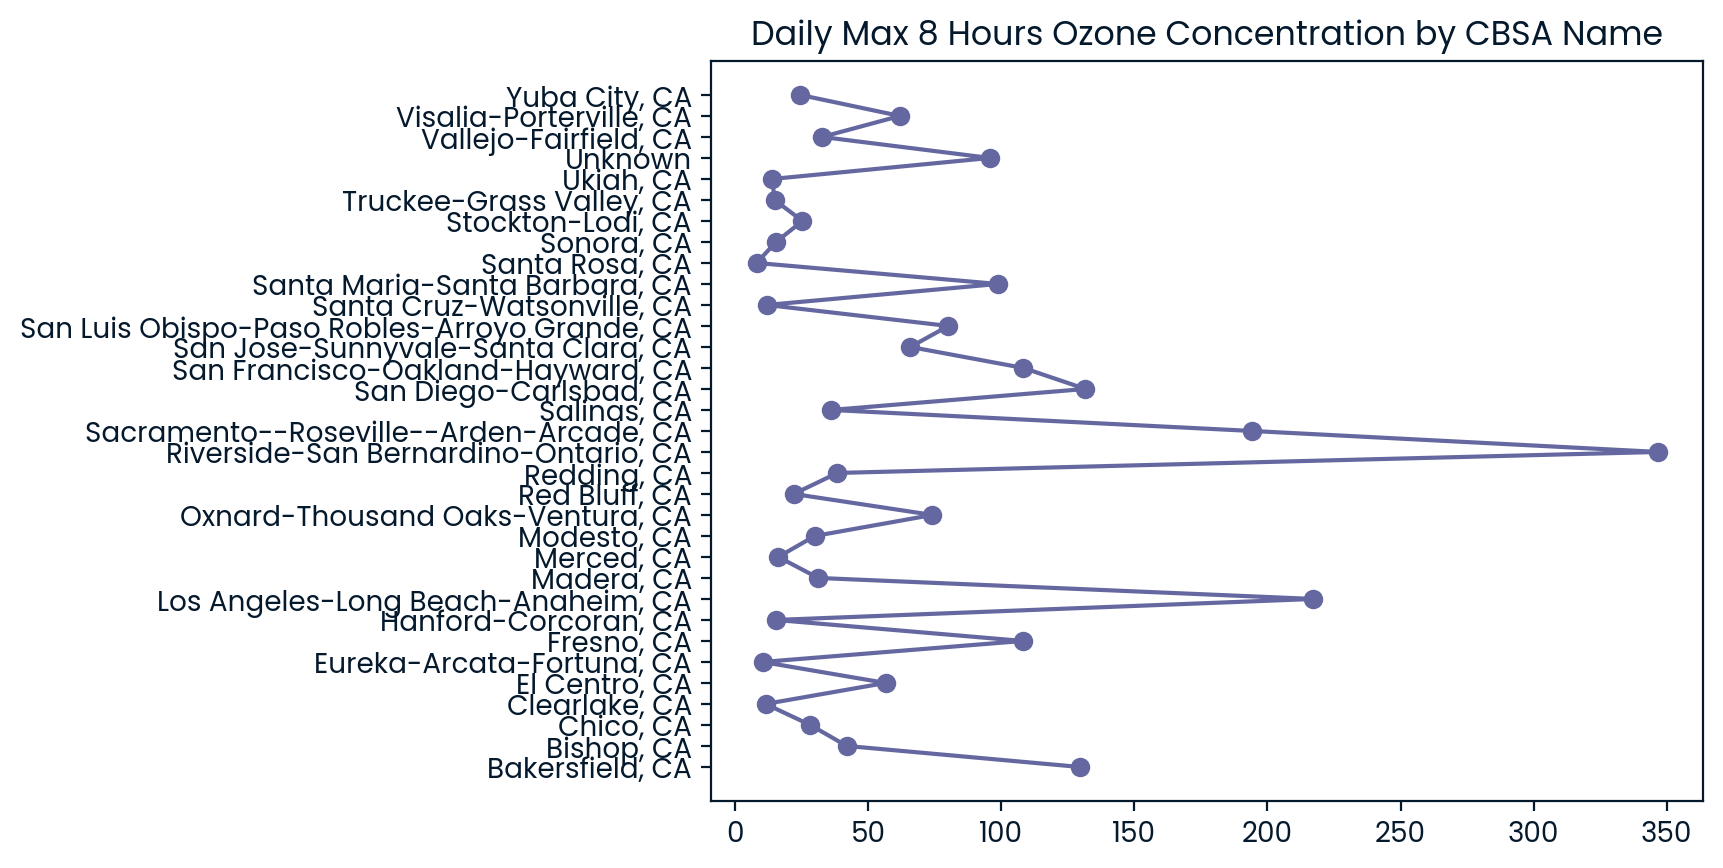

In [71]:
bycbsa = ozone.groupby(by = "cbsa_name").daily_ozone_concentration.sum().reset_index()
bycbsa.rename(columns={
    "daily_ozone_concentration" : "dm_sum",
}, inplace =True)

#plt.figure(figsize=(30,20))
y=bycbsa['cbsa_name']
x = bycbsa['dm_sum']
plt.plot(x, y, marker='o', linestyle='-' )
plt.title('Daily Max 8 Hours Ozone Concentration by CBSA Name')
plt.show()

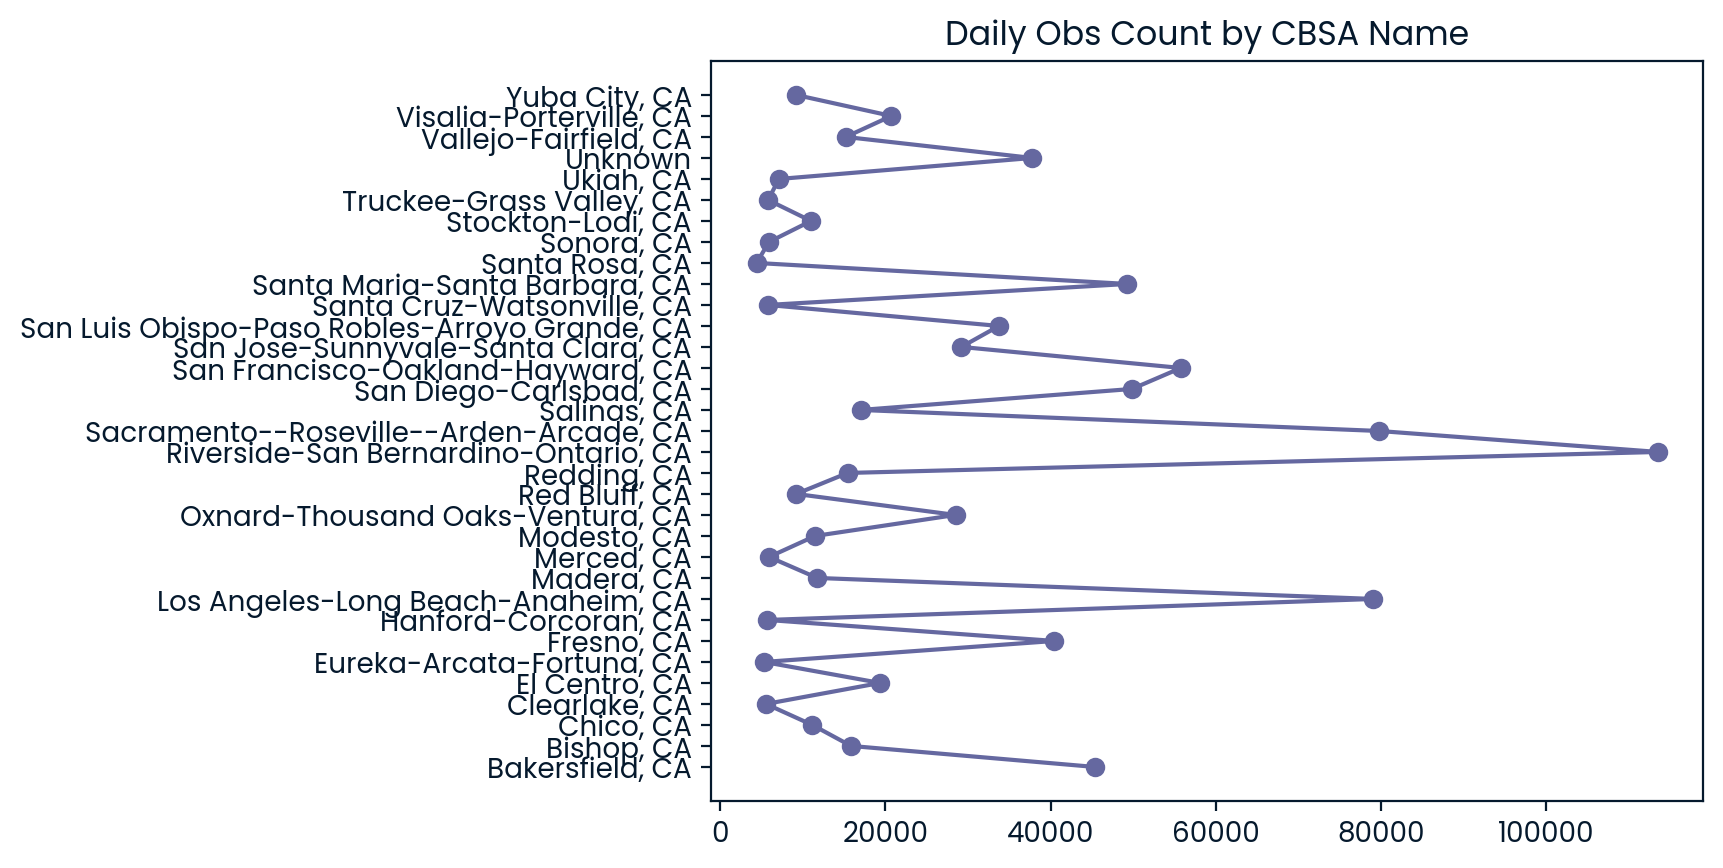

In [72]:
bycbsa2 = ozone.groupby(by = "cbsa_name").daily_obs_count.sum().reset_index()
bycbsa2.rename(columns={
    "daily_obs_count" : "do_count",
}, inplace =True)

#plt.figure(figsize=(15,20))
y=bycbsa2['cbsa_name']
x = bycbsa2['do_count']
plt.plot(x, y, marker ="o", linestyle="-")
plt.title('Daily Obs Count by CBSA Name')
plt.show()

In [73]:

county_ozone = ozone.groupby('month')['daily_ozone_concentration'].idxmax()
county_high_ozone = ozone.loc[county_ozone, ['month','county','daily_ozone_concentration']]
print(county_high_ozone)

       month          county  daily_ozone_concentration
1526       1          Amador                     0.0765
31791      2  San Bernardino                     0.0560
17580      3     Los Angeles                     0.0650
8293       4        Imperial                     0.0765
8335       5        Imperial                     0.0765
5123       6          Fresno                     0.0765
1517       7          Amador                     0.0765
5202       8          Fresno                     0.0765
5209       9          Fresno                     0.0765
5235      10          Fresno                     0.0765
46914     11        Siskiyou                     0.0690
46958     12        Siskiyou                     0.0670


In [74]:
perc_difhighcounty = (county_high_ozone['county'].nunique()/ozone['county'].count())*100

perc_diflowcounty = ((ozone['county'].count()-county_high_ozone['county'].nunique())/ozone['county'].count())*100

newdf = {'rate':['Higher','Lower'],'value':[perc_difhighcounty,perc_diflowcounty]}

newdf = pd.DataFrame(newdf)
print(newdf)

     rate      value
0  Higher   0.011839
1   Lower  99.988161


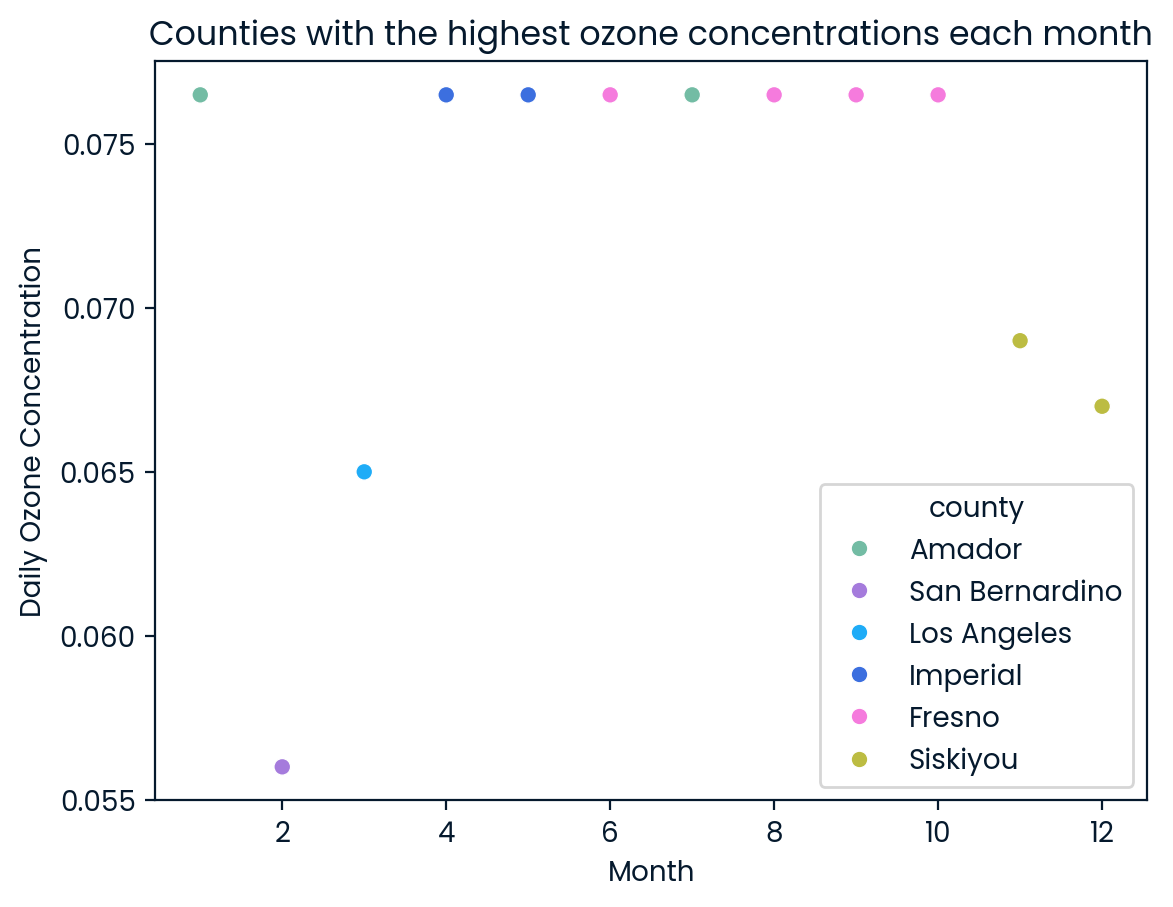

In [75]:
import seaborn as sns

county_ozone = ozone.groupby('month')['daily_ozone_concentration'].idxmax()
county_high_ozone = ozone.loc[county_ozone, ['month','county','daily_ozone_concentration']]

colors=["#73bca4",  "#a57bdc",  "#1facf7", "#3c6fdf", "#f57bdd", "#bcbc42"]
#plt.figure(figsize= (10,5))
sns.scatterplot(
    y = county_high_ozone['daily_ozone_concentration'],
    x=county_high_ozone['month'],
    hue = county_high_ozone['county'],
    data = county_high_ozone.sort_values(by= 'month', ascending= True),
    marker ="o",
    palette=colors
)

plt.title("Counties with the highest ozone concentrations each month")
plt.xlabel('Month')
plt.ylabel('Daily Ozone Concentration')
plt.show()


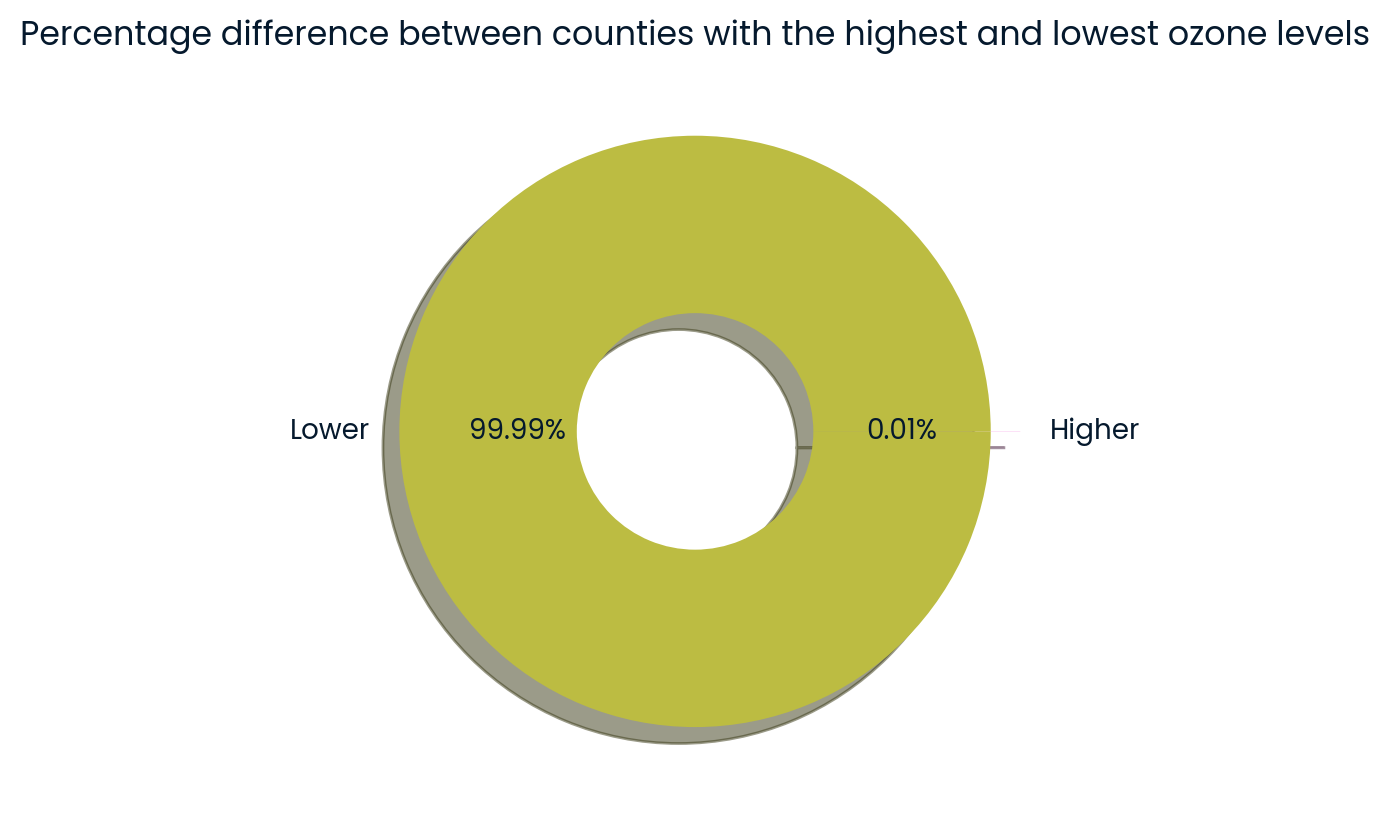

In [76]:
#plt.figure(figsize=(10,5))

colors=[ "#f57bdd", "#bcbc42"]
explode = (0.1, 0)

plt.pie(
    x = newdf['value'],
    labels = newdf['rate'],
    autopct = '%1.2f%%',
    colors=colors,
    explode = explode,
    shadow=True,
    wedgeprops={'width':0.6}
)
plt.title("Percentage difference between counties with the highest and lowest ozone levels", loc="center", fontsize=12)
plt.show()

In [77]:

localsite_ozone = ozone.groupby('month')['daily_ozone_concentration'].idxmax()
localsite_high_ozone = ozone.loc[localsite_ozone, ['month','local_site_name','daily_ozone_concentration']]
print(localsite_high_ozone)

       month          local_site_name  daily_ozone_concentration
1526       1     Jackson-Clinton Road                     0.0765
31791      2  Victorville-Park Avenue                     0.0560
17580      3            Santa Clarita                     0.0650
8293       4    Calexico-Ethel Street                     0.0765
8335       5    Calexico-Ethel Street                     0.0765
5123       6          Fresno-Drummond                     0.0765
1517       7     Jackson-Clinton Road                     0.0765
5202       8          Fresno-Drummond                     0.0765
5209       9          Fresno-Drummond                     0.0765
5235      10          Fresno-Drummond                     0.0765
46914     11                    Yreka                     0.0690
46958     12                    Yreka                     0.0670


In [78]:
perc_difhiglocsite = (localsite_high_ozone['local_site_name'].nunique()/ozone['local_site_name'].count())*100

perc_diflowlocsite = ((ozone['local_site_name'].count()-localsite_high_ozone['local_site_name'].nunique())/ozone['local_site_name'].count())*100

newdf_ = {'rate':['Higher','Lower'],'value':[perc_difhiglocsite,perc_diflowlocsite]}

newdf_ = pd.DataFrame(newdf_)
print(newdf_)

     rate      value
0  Higher   0.011839
1   Lower  99.988161


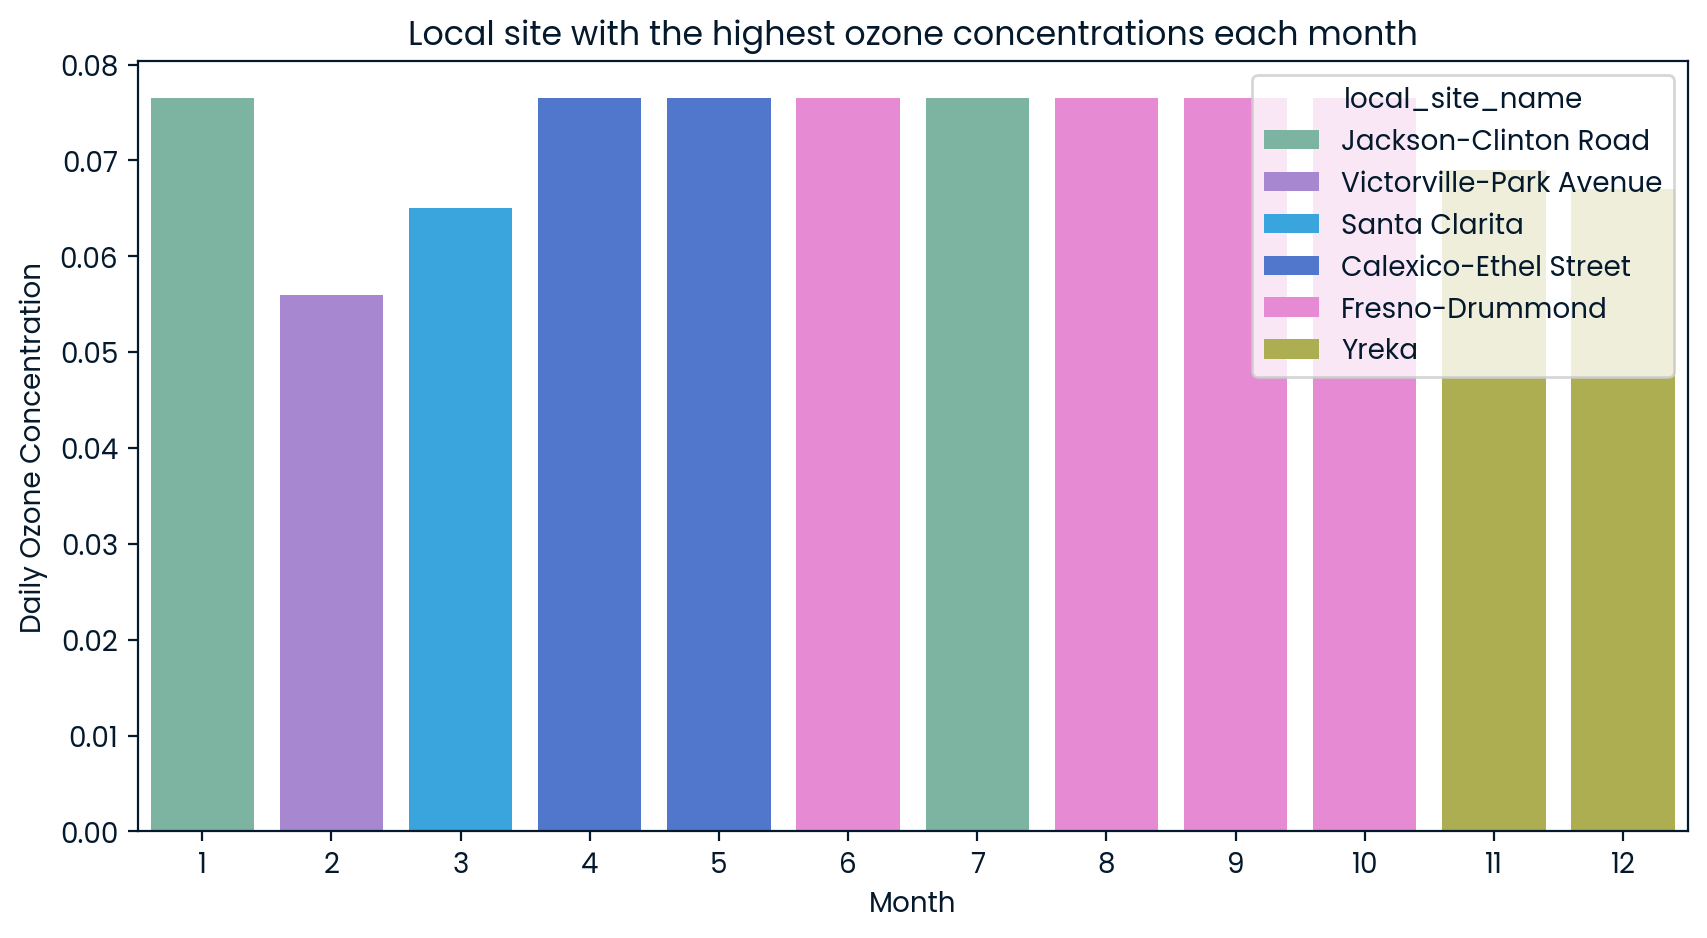

In [79]:

localsite_ozone = ozone.groupby('month')['daily_ozone_concentration'].idxmax()
localsite_high_ozone = ozone.loc[localsite_ozone, ['month','local_site_name','daily_ozone_concentration']]

colors=["#73bca4",  "#a57bdc",  "#1facf7", "#3c6fdf", "#f57bdd", "#bcbc42"]
plt.figure(figsize= (10,5))
sns.barplot(
    y = localsite_high_ozone['daily_ozone_concentration'],
    x=localsite_high_ozone['month'],
    hue = localsite_high_ozone['local_site_name'],
    data = localsite_high_ozone.sort_values(by= 'month', ascending= True),
    #marker ="o",
    palette=colors
)

plt.title("Local site with the highest ozone concentrations each month")
plt.xlabel('Month')
plt.ylabel('Daily Ozone Concentration')
plt.show()

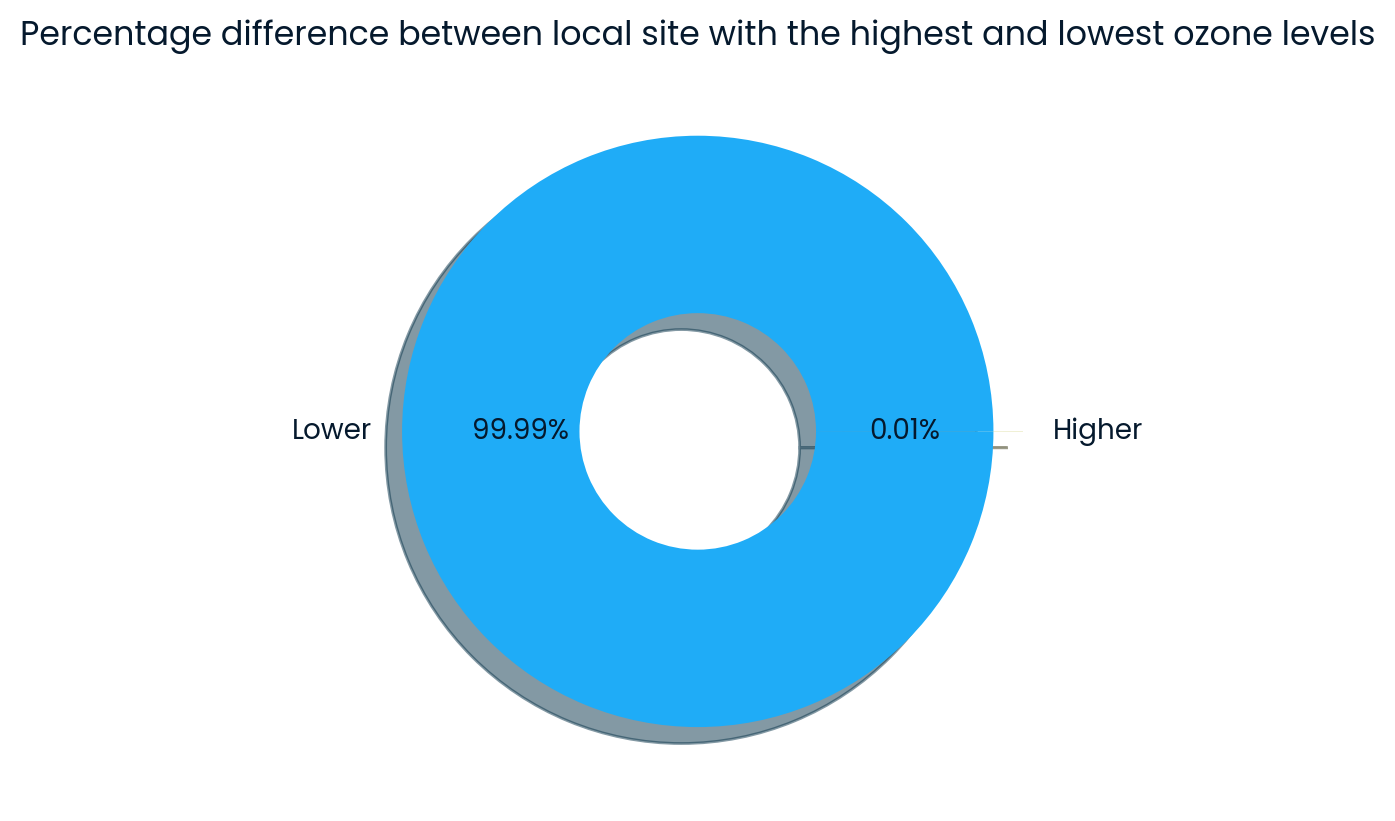

In [80]:
#plt.figure(figsize=(10,5))

colors=["#bcbc42","#1facf7"]
explode = (0.1, 0)

plt.pie(
    x = newdf_['value'],
    labels = newdf_['rate'],
    autopct = '%1.2f%%',
    colors=colors,
    explode = explode,
    shadow=True,
    wedgeprops={'width':0.6}
)
plt.title("Percentage difference between local site with the highest and lowest ozone levels", loc="center", fontsize=12)
plt.show()

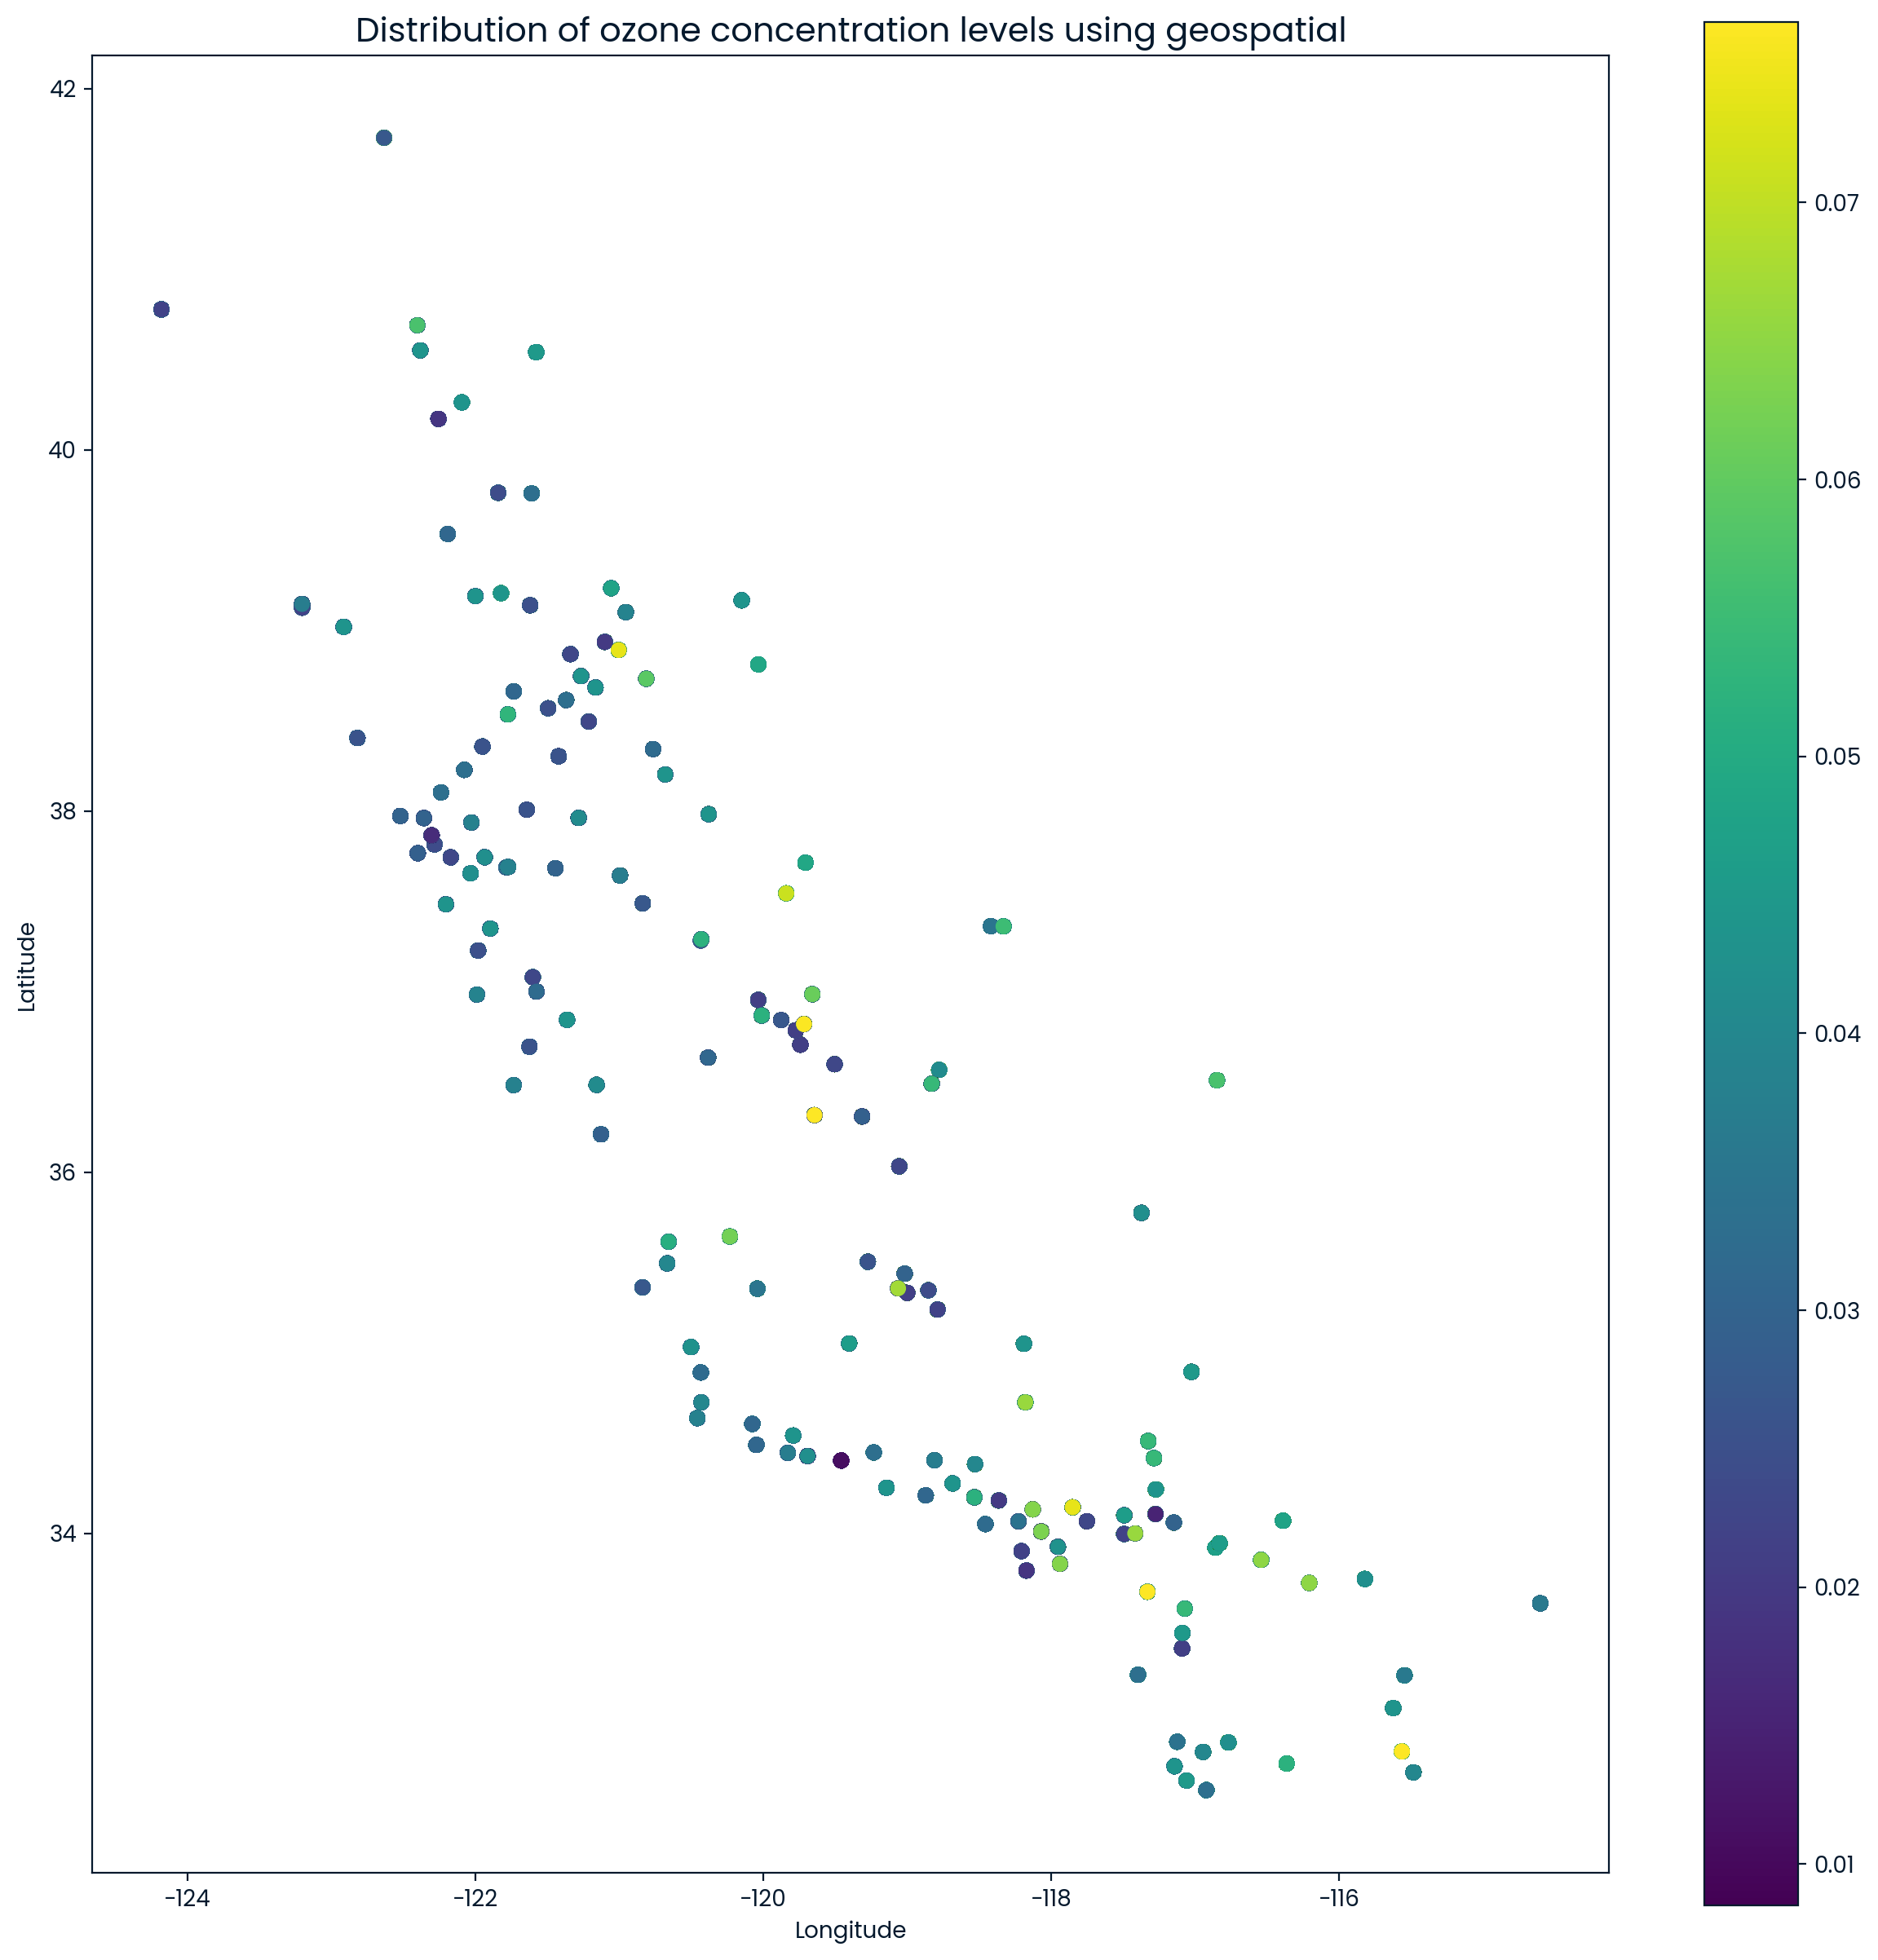

In [81]:
import geopandas as gpd
from shapely.geometry import Point

#create geometric columns
geometry = [Point(xy) for xy in zip(ozone['site_longitude'], ozone['site_latitude'])]
gdf = gpd.GeoDataFrame(ozone, geometry=geometry, crs="EPSG:4326")

#Displays data on a map
gdf.plot(column='daily_ozone_concentration', legend=True, figsize=(15, 15))
plt.title("Distribution of ozone concentration levels using geospatial", loc= "center", fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [82]:

ozone['weekday/end'] = ozone.day.apply(lambda x: "weekday" if x <= 4 else "weekend")
ozone.head()

,date,daily_ozone_concentration,local_site_name,daily_obs_count,cbsa_name,county,site_latitude,site_longitude,day,month,weekday/end
0,2024-01-01,0.031000,Livermore,17,"San Francisco-Oakland-Hayward, CA",Alameda,37.687526,-121.784217,0,1,weekday
1,2024-01-02,0.037000,Livermore,17,"San Francisco-Oakland-Hayward, CA",Alameda,37.687526,-121.784217,1,1,weekday
2,2024-01-01,0.043639,Livermore,17,"San Francisco-Oakland-Hayward, CA",Alameda,37.687526,-121.784217,0,1,weekday
3,2024-01-04,0.026000,Livermore,17,"San Francisco-Oakland-Hayward, CA",Alameda,37.687526,-121.784217,3,1,weekday
4,2024-01-05,0.027000,Livermore,17,"San Francisco-Oakland-Hayward, CA",Alameda,37.687526,-121.784217,4,1,weekday


In [83]:
weekdayend_ozone = ozone.groupby(['weekday/end','month'])['daily_ozone_concentration'].max()
print(weekdayend_ozone)

weekday/end  month
weekday      1        0.0765
             2        0.0540
             3        0.0650
             4        0.0765
             5        0.0765
             6        0.0765
             7        0.0765
             8        0.0765
             9        0.0765
             10       0.0765
             11       0.0690
             12       0.0670
weekend      1        0.0560
             2        0.0560
             3        0.0550
             4        0.0765
             5        0.0765
             6        0.0765
             7        0.0765
             8        0.0765
             9        0.0765
             10       0.0765
             11       0.0650
             12       0.0660
Name: daily_ozone_concentration, dtype: float64


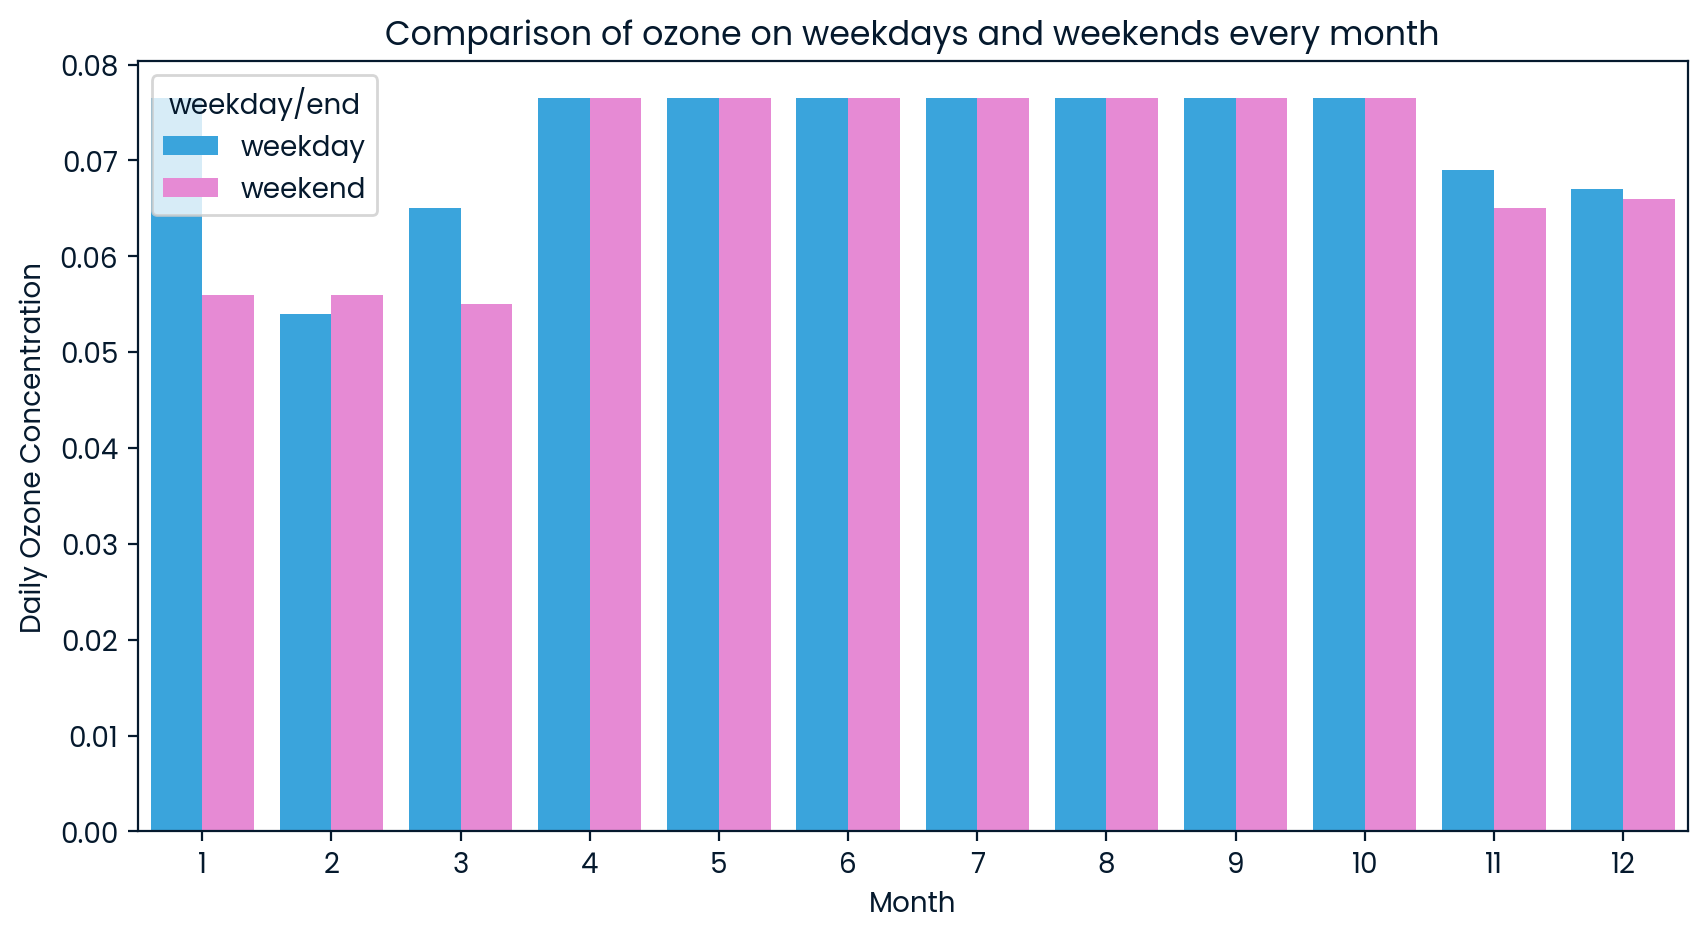

In [84]:
byweekdayend_ozone = ozone.groupby(['weekday/end','month']).daily_ozone_concentration.max().reset_index()
byweekdayend_ozone.rename(columns={
    'daily_ozone_concentration' : 'max'
}, inplace=True)

colors=["#1facf7", "#f57bdd"]
plt.figure(figsize= (10,5))
sns.barplot(
    y = "max",
    x="month",
    hue = "weekday/end",
    data = byweekdayend_ozone.sort_values(by= 'month', ascending= True),
    palette=colors
)

plt.title("Comparison of ozone on weekdays and weekends every month")
plt.xlabel('Month')
plt.ylabel('Daily Ozone Concentration')
plt.show()

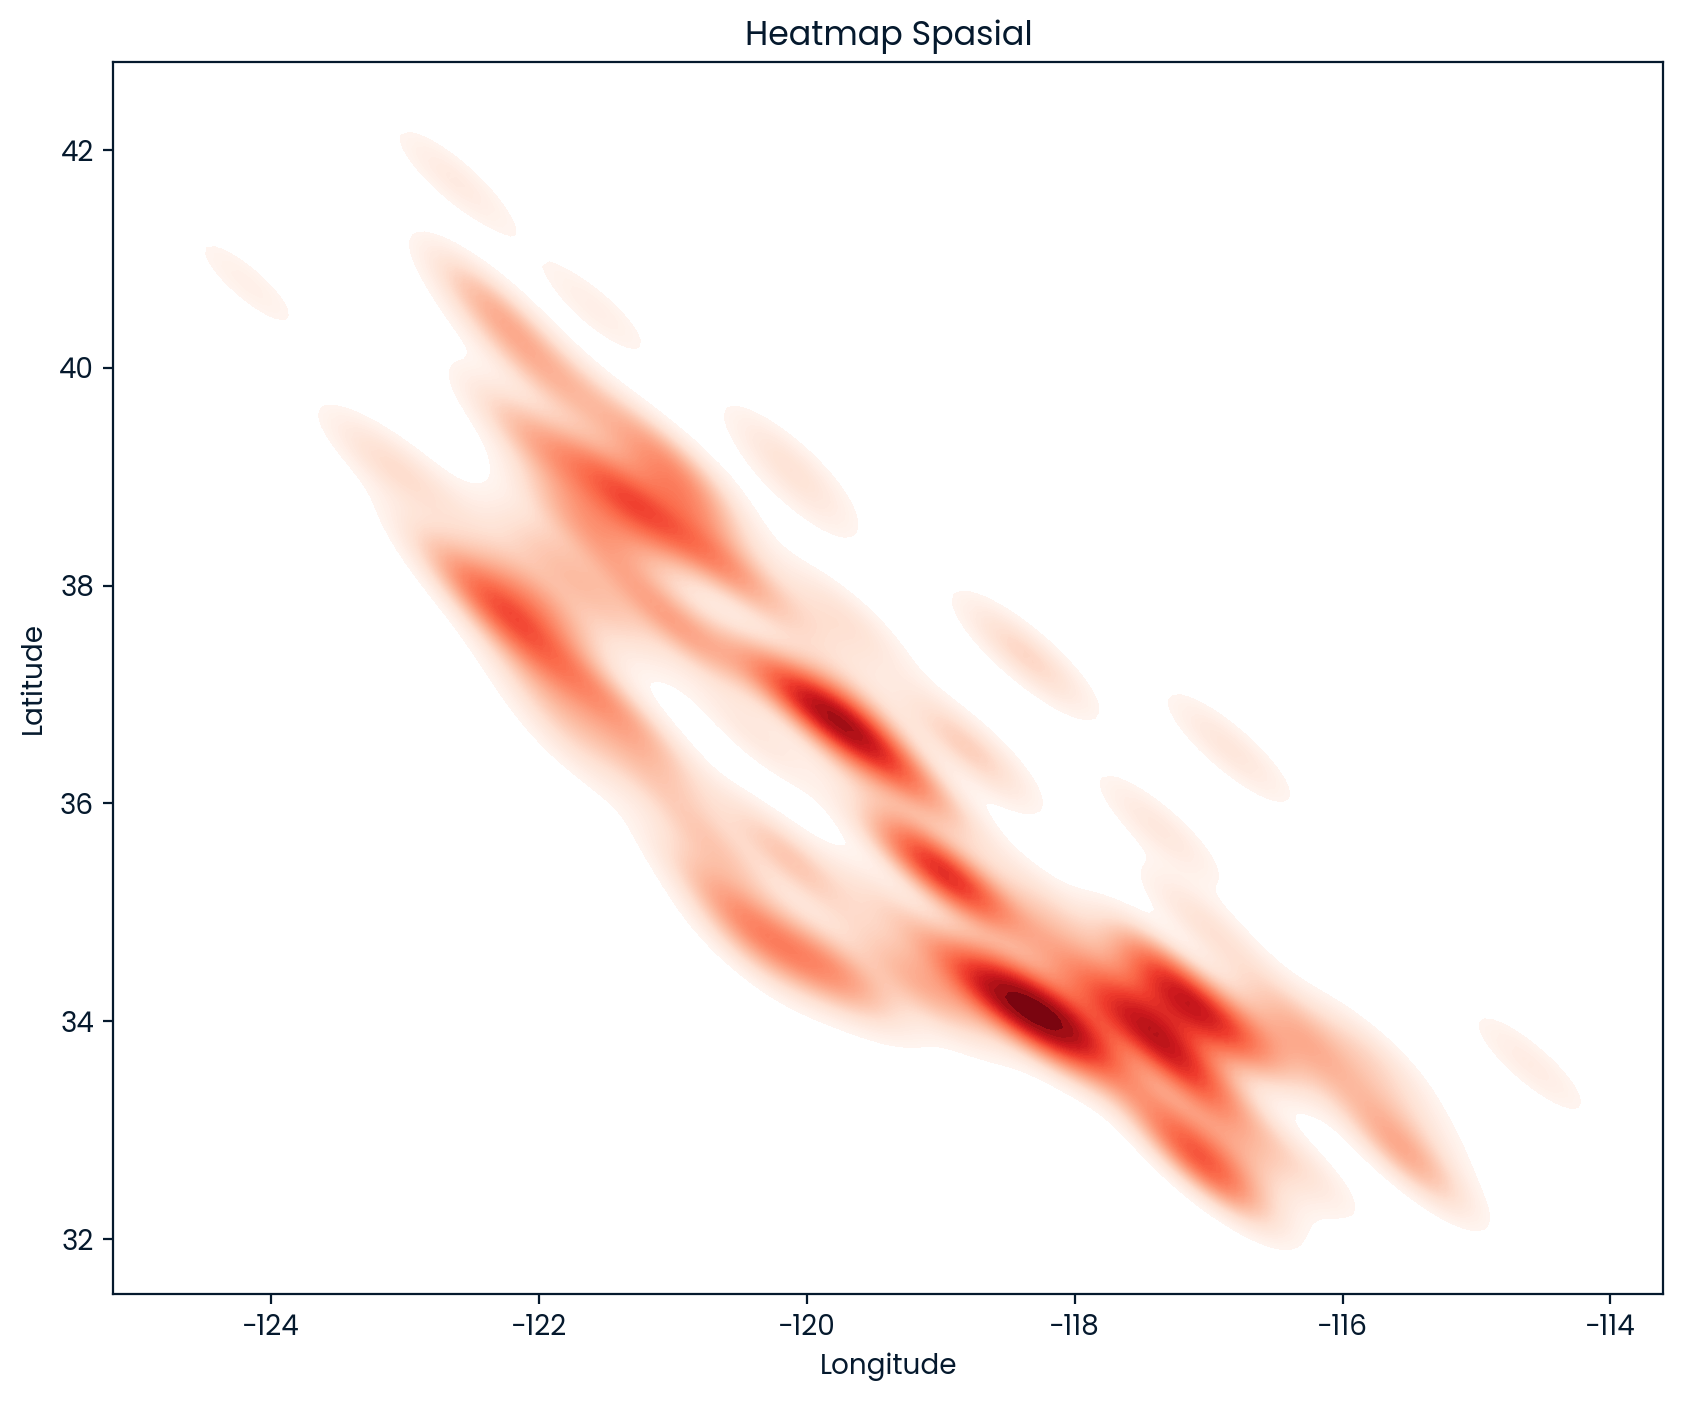

In [85]:
gdf = gpd.GeoDataFrame(ozone, geometry=gpd.points_from_xy(ozone.site_longitude, ozone.site_latitude))

# Creating a heatmap with Seaborn
plt.figure(figsize=(10, 8))
sns.kdeplot(x=gdf.geometry.x, y=gdf.geometry.y, weights=gdf['daily_ozone_concentration'], fill=True, cmap="Reds", levels=100)
plt.title('Heatmap Spasial')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [86]:
ozone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50682 entries, 0 to 54758
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       50682 non-null  datetime64[ns]
 1   daily_ozone_concentration  50682 non-null  float64       
 2   local_site_name            50682 non-null  object        
 3   daily_obs_count            50682 non-null  int64         
 4   cbsa_name                  50682 non-null  object        
 5   county                     50682 non-null  object        
 6   site_latitude              50682 non-null  float64       
 7   site_longitude             50682 non-null  float64       
 8   day                        50682 non-null  int32         
 9   month                      50682 non-null  int32         
 10  weekday/end                50682 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(4)
memory u

## **Executive Summary**

This analysis was conducted to determine daily ozone concentrations in various regions measured over time using several measurement methods from an initial dataset containing 54,759 entries. The dataset was explored to identify areas that consistently exhibit high ozone levels and to examine differences in results using different measurement methods.

To achieve clear results, the initial dataset was cleaned by imputing missing values, removing duplicates, and addressing outliers with upper and lower bound values, resulting in a dataset containing 50,682 entries. The EDA results obtained were:
1. The highest ozone level throughout the year was 0.0765.
2. Ozone levels at the beginning of the year were the highest throughout the year.
3. Ozone levels decreased in the last two months of the year.
4. Three areas consistently had the highest ozone levels for several months: Amador for two months, Imperial for two months, and Fresno for four months.
5. Three local sites consistently had the highest ozone levels for several months: Jackson-Clinton Road for two months, Calexico-Ethel Street for two months, and Fresno-Drummond for four months.
6. The number of areas with high ozone levels is equal to the number of local sites with high ozone levels, as seen from the high ozone levels for each month of the year. There is no change in the data in these features.
7. The percentage difference between the number of areas with high ozone levels and the number of areas with low ozone levels is 0.01 : 99.9. This percentage is also shown in the percentage difference between the number of local sites with high ozone levels and low ozone levels.
8. Geospatial analysis reveals a difference in the number of cities with high ozone levels (>=0.07). Six points (longitude, latitude) have high ozone levels, whereas in previous data, only three areas and local sites had high ozone levels.
9. The highest ozone levels were balanced on weekdays and weekends for 7 months (March - October), both reaching 0.0765. In other months, there were differences in ozone levels between weekdays and weekends.
10. Ozone levels tended to be higher on weekdays almost every month except February.

Based on the analysis above, it is recommended that:
1. Intensive monitoring of areas with the highest ozone levels
2. Public education on the dangers of high ozone exposure and how to mitigate them, especially during months consistently high ozone levels
3. Anticipating ozone increases in areas and local sites with low ozone levels to avoid additional areas and local sites with high ozone levels
4. Developing scenarios to achieve low ozone levels on weekdays, as February's ozone levels are lower on weekdays than on weekends. This can also be implemented for subsequent months, both on weekdays and weekends.